# Example for beamsection module

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
#import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt
import pprint
import pandas as pd

import sys
sys.path.append("src")
import beamsection


In [10]:
b = 500    # frame pitch
ts = 1.6   # skin thickness
tf = 1.6   # frame thickness
hf = 80    # frame height
bf = 20    # frame flange width

verts = [
    #(0, 0),
    (b/2, 0),
    (b/2, ts),
    (tf/2, ts), 
    (tf/2, hf-tf),
    (bf/2, hf-tf),
    (bf/2, hf),
    (-bf/2, hf),
    (-bf/2, hf-tf),
    (-tf/2, hf-tf),
    (-tf/2, ts),
    (-b/2, ts),
    (-b/2, 0)
    
]

sec = beamsection.PolygonSection(verts)

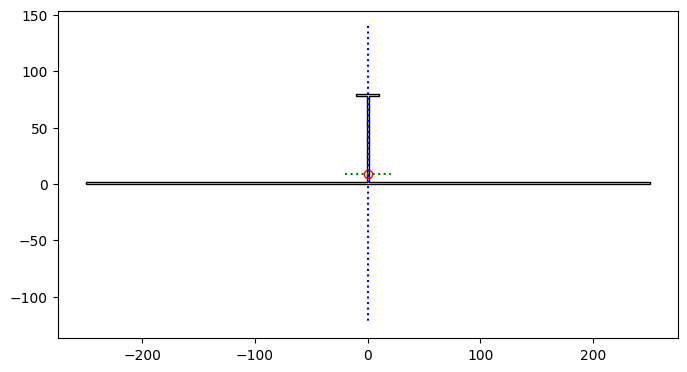

In [11]:
fig = sec.section_plot()

In [12]:
print(sec.report_txt())


Simple Section Bending Analysis

Title: 
--------------------------
	
User: tbd
Date: tbd
Version: tbd
Machine/OS: tbd

	
Input Data
----------

vert       y0       z0
   0   250.00     0.00 
   1   250.00     1.60 
   2     0.80     1.60 
   3     0.80    78.40 
   4    10.00    78.40 
   5    10.00    80.00 
   6   -10.00    80.00 
   7   -10.00    78.40 
   8    -0.80    78.40 
   9    -0.80     1.60 
  10  -250.00     1.60 
  11  -250.00     0.00 



Reference System
----------------

Area: 
  A = 954.8799999999999
  
Centroid: 
  y0n = 0.0
  z0n = 8.47184986595174
  
Inertia:
  iy0  = 458419.95093333285
  iz0  = 16667759.547733335
  iyz0 = 0.0
	
	
Centroid System
---------------

vert        y        z
   0   250.00    -8.47 
   1   250.00    -6.87 
   2     0.80    -6.87 
   3     0.80    69.93 
   4    10.00    69.93 
   5    10.00    71.53 
   6   -10.00    71.53 
   7   -10.00    69.93 
   8    -0.80    69.93 
   9    -0.80    -6.87 
  10  -250.00    -6.87 
  11  -250.00    -

## Circular Fuselage

In [13]:
# hoop stresses due to internal pressure
dp_6000_mpa = 0.0574
p_ult_mpa = 1.5 * 1.33 * dp_6000_mpa
print(f'ultimate differential pressure: {p_ult_mpa:.4f} MPa')

# average radius
ravg = 1487.5 # mm

# normal force
N_hoop = p_ult_mpa * ravg * b
print(f'Hoop force (ult): {N_hoop:.1f} N')

# stresses in section
stress_result = sec.stresses(N_hoop, 0, 0, lcase="2dp")
pprint.pprint(stress_result)

ultimate differential pressure: 0.1145 MPa
Hoop force (ult): 85169.0 N
{'LAP': (0.0, 8.47184986595174),
 'My': 0,
 'Mz': 0,
 'N': 85169.04375,
 'lcase': '2dp',
 'myn': 0.0,
 'mzn': 0.0,
 'sigma': array([( 0,  250. ,  0. , 89.19345232), ( 1,  250. ,  1.6, 89.19345232),
       ( 2,    0.8,  1.6, 89.19345232), ( 3,    0.8, 78.4, 89.19345232),
       ( 4,   10. , 78.4, 89.19345232), ( 5,   10. , 80. , 89.19345232),
       ( 6,  -10. , 80. , 89.19345232), ( 7,  -10. , 78.4, 89.19345232),
       ( 8,   -0.8, 78.4, 89.19345232), ( 9,   -0.8,  1.6, 89.19345232),
       (10, -250. ,  1.6, 89.19345232), (11, -250. ,  0. , 89.19345232)],
      dtype=[('vid', '<i4'), ('y0', '<f8'), ('z0', '<f8'), ('sig', '<f8')])}


In [14]:
df = pd.DataFrame(data=stress_result['sigma'])
df

,vid,y0,z0,sig
0,0,250.0,0.0,89.193452
1,1,250.0,1.6,89.193452
2,2,0.8,1.6,89.193452
3,3,0.8,78.4,89.193452
4,4,10.0,78.4,89.193452
5,5,10.0,80.0,89.193452
6,6,-10.0,80.0,89.193452
7,7,-10.0,78.4,89.193452
8,8,-0.8,78.4,89.193452
9,9,-0.8,1.6,89.193452
